In [1]:
from matplotlib import use, cm
use('Agg')
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from estimateGaussian import estimateGaussian
from selectThreshold import selectThreshold
from multivariateGaussian import multivariateGaussian
from visualizeFit import visualizeFit

## Machine Learning Online Class
#  Exercise 8 | Anomaly Detection and Collaborative Filtering
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     estimateGaussian.m
#     selectThreshold.m
#     cofiCostFunc.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#



Visualizing example dataset for outlier detection.


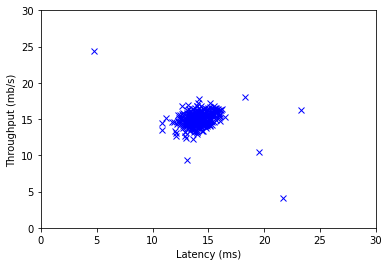

In [2]:
%matplotlib inline
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easy to
#  visualize.
#
#  Our example case consists of 2 network server statistics across
#  several machines: the latency and throughput of each machine.
#  This exercise will help us find possibly faulty (or very fast) machines.
#

print ('Visualizing example dataset for outlier detection.')

#  The following command loads the dataset. You should now have the
#  variables X, Xval, yval in your environment
data = scipy.io.loadmat('ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

Visualizing Gaussian fit.


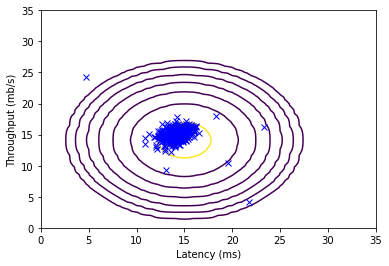

In [3]:
## ================== Part 2: Estimate the dataset statistics ===================
#  For this exercise, we assume a Gaussian distribution for the dataset.
#
#  We first estimate the parameters of our assumed Gaussian distribution, 
#  then compute the probabilities for each of the points and then visualize 
#  both the overall distribution and where each of the points falls in 
#  terms of that distribution.
#
print ('Visualizing Gaussian fit.')

#  Estimate mu and sigma2
mu, sigma2 = estimateGaussian(X)

#  Returns the density of the multivariate normal at each data point (row) 
#  of X
p = multivariateGaussian(X, mu, sigma2)

#  Visualize the fit
visualizeFit(X,  mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()


Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set:  0.437500
(you should see a value epsilon of about 8.99e-05)


/root/jupyter_projects/Coursera-Stanford-ML-Python-master/ex8/selectThreshold.py:30: RuntimeWarning: invalid value encountered in long_scalars
  Precision = TP/(TP+FP)


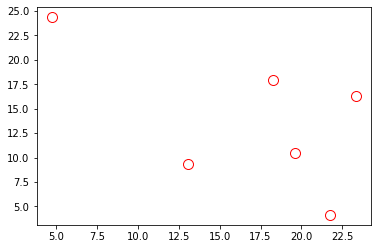

In [4]:
## ================== Part 3: Find Outliers ===================
#  Now you will find a good epsilon threshold using a cross-validation set
#  probabilities given the estimated Gaussian distribution
# 

pval = multivariateGaussian(Xval, mu, sigma2)

epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: %e' % epsilon)
print ('Best F1 on Cross Validation Set:  %f' % F1)
print ('(you should see a value epsilon of about 8.99e-05)')

#  Find the outliers in the training set and plot the
outliers = np.where(p < epsilon, True, False)

#  Draw a red circle around those outliers
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', lw=2, markersize=10, fillstyle='none', markeredgewidth=1)
plt.show()

In [9]:
## ================== Part 4: Multidimensional Outliers ===================
#  We will now use the code from the previous part and apply it to a 
#  harder problem in which more features describe each datapoint and only 
#  some features indicate whether a point is an outlier.
#

#  Loads the second dataset. You should now have the
#  variables X, Xval, yval in your environment
data = scipy.io.loadmat('ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

#  Apply the same steps to the larger dataset
mu, sigma2 = estimateGaussian(X)

#  Training set 
p = multivariateGaussian(X, mu, sigma2)

#  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2)

#  Find the best threshold
epsilon, F1 = selectThreshold(yval, pval)

print ('Best epsilon found using cross-validation: %e' % epsilon)
print ('Best F1 on Cross Validation Set:  %f' % F1)
print ('# Outliers found: %d' % sum(p < epsilon))
print ('(you should see a value epsilon of about 1.38e-18)')


Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.307692
# Outliers found: 117
(you should see a value epsilon of about 1.38e-18)


In [10]:
X.shape

(1000, 11)